In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/home/rz4983/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
df = pd.read_csv('3OEC_current_flow.csv')

df["O2_avg"] = df[["O2_S1", "O2_S2", "O2_S3"]].mean(axis=1)

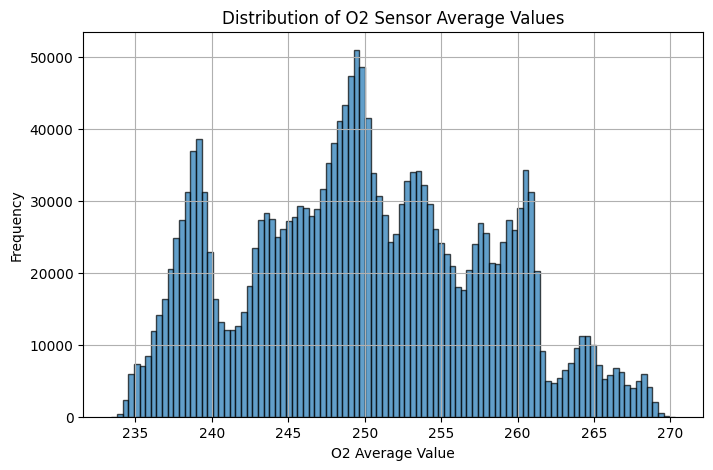

In [11]:
# Plot the distribution
plt.figure(figsize=(8, 5))
plt.hist(df["O2_avg"], bins=100, edgecolor="black", alpha=0.7)
plt.xlabel("O2 Average Value")
plt.ylabel("Frequency")
plt.title("Distribution of O2 Sensor Average Values")
plt.grid(True)

# Show the plot
plt.show()

### Let's try to fit a Generalized Extreme Value distribution

In [12]:
from scipy.stats import genextreme

In [13]:
shape, loc, scale = genextreme.fit(df["O2_avg"])

In [14]:
import numpy as np

In [15]:
x = np.linspace(df["O2_avg"].min(), df["O2_avg"].max(), 100)
pdf = genextreme.pdf(x, shape, loc=loc, scale=scale)

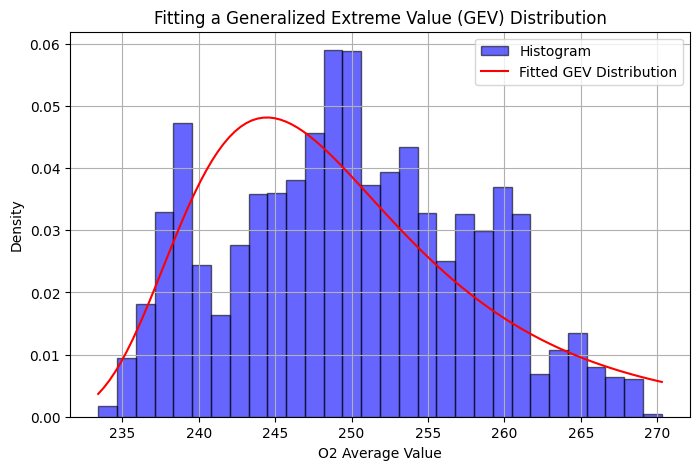

GEV Shape Parameter: -0.1142
GEV Location Parameter: 245.2865
GEV Scale Parameter: 7.6851


In [16]:
# Plot histogram and fitted GEV distribution
plt.figure(figsize=(8, 5))
plt.hist(df["O2_avg"], bins=30, density=True, alpha=0.6, color='blue', edgecolor='black', label="Histogram")
plt.plot(x, pdf, 'r-', label="Fitted GEV Distribution")
plt.xlabel("O2 Average Value")
plt.ylabel("Density")
plt.title("Fitting a Generalized Extreme Value (GEV) Distribution")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print estimated parameters
print(f"GEV Shape Parameter: {shape:.4f}")
print(f"GEV Location Parameter: {loc:.4f}")
print(f"GEV Scale Parameter: {scale:.4f}")